<b>¡Hola Daniel!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!


## Inicialización

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import matplotlib.pyplot as plt
import seaborn as sns
import inspect

## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

# Generador de entrenamiento con aumentos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# Generador de validación sin aumentos
val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Generador de flujo de datos de entrenamiento
train_generator = train_datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(64, 64),
    batch_size=32,
    class_mode='raw',
    subset='training',
    seed=123
)

# Generador de flujo de datos de validación
val_generator = val_datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(64, 64),
    batch_size=32,
    class_mode='raw',
    subset='validation',
    seed=123
)

Found 6073 validated image filenames.
Found 1518 validated image filenames.


## EDA

In [3]:
# Cargar etiquetas
df_edad = pd.read_csv('/datasets/faces/labels.csv')
df_edad.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has comenzado bien al cargar y mostrar las primeras filas del dataset. Esto es un paso crucial para entender la estructura de los datos, verificar que se han cargado correctamente y comenzar a familiarizarte con el contenido del dataset.
</div>


In [4]:
# info del df
df_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


<div class="alert alert-block alert-warning">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Has revisado la información básica del DataFrame, lo cual es un buen inicio. Sería beneficioso también verificar los tipos de datos para asegurarte de que son los adecuados para el análisis posterior. Esto te ayudará a evitar problemas durante el procesamiento de datos. Si encuentras tipos de datos inesperados, puedes utilizar el método <code>astype()</code> para realizar las conversiones necesarias.
</div>


In [5]:
#Descripcion de valores importantes del df
df_edad.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


<div class="alert alert-block alert-success">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
La descripción estadística que has realizado proporciona una visión general clara de la distribución de las edades en el dataset. Esto es esencial para identificar posibles valores atípicos y comprender el rango y la variabilidad de los datos, lo cual es fundamental para el análisis posterior.
</div>


In [6]:
# Dimensiones del dataset
print(f"\nNúmero total de imágenes: {len(labels)}")


Número total de imágenes: 7591


In [7]:
#Valores duplicados
print("Duplicados totales:", df_edad.duplicated().sum())

Duplicados totales: 0


<div class="alert alert-block alert-success">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
Verificar la presencia de duplicados en el dataset es un paso importante para asegurar la integridad de los datos. Confirmar que no hay duplicados garantiza que cada entrada es única, lo que es crucial para evitar sesgos en el análisis y en el entrenamiento del modelo.
</div>


In [8]:
#Valores nulos
df_edad.isnull().sum()

file_name    0
real_age     0
dtype: int64

<div class="alert alert-block alert-success">
<b>Celda [8]</b> <a class="tocSkip"></a><br>
Has realizado una verificación efectiva de valores nulos en el dataset. Asegurarte de que no hay valores nulos es esencial para mantener la calidad de los datos y para evitar problemas durante el análisis y el entrenamiento del modelo.
</div>


In [9]:
df_edad.sort_values(by="real_age").sum()
df_edad.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [10]:
# Personas más jóvenes
print(df_edad.sort_values(by="real_age").head())

# Personas más viejas
print(df_edad.sort_values(by="real_age", ascending=False).head())

       file_name  real_age
1005  001005.jpg         1
7313  007335.jpg         1
251   000251.jpg         1
7019  007030.jpg         1
3099  003099.jpg         1
       file_name  real_age
2661  002661.jpg       100
5806  005806.jpg        97
6248  006252.jpg        96
6379  006383.jpg        96
6332  006336.jpg        95


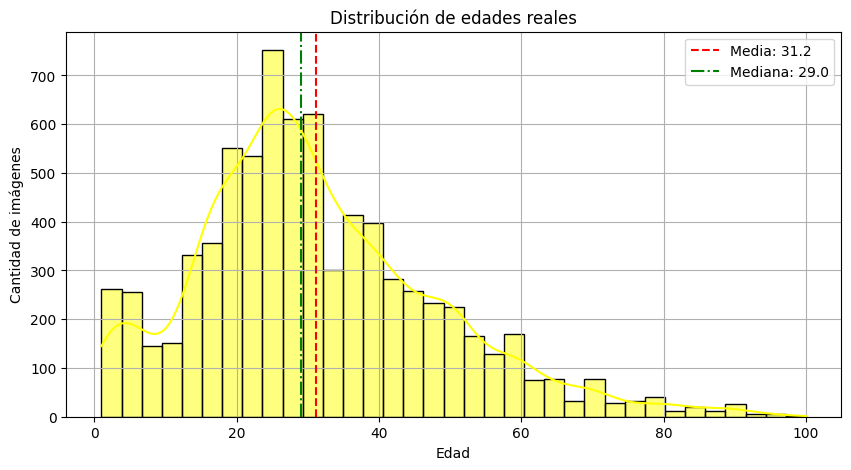

In [11]:
# Histograma de la distribución de edades
plt.figure(figsize=(10, 5))
sns.histplot(labels['real_age'], bins=35, kde=True, color="yellow")
plt.title('Distribución de edades reales')
plt.xlabel('Edad')
plt.ylabel('Cantidad de imágenes')
plt.grid(True)
mean_age = labels['real_age'].mean() #obtener la media
median_age = labels['real_age'].median() #obtener la mediana

plt.axvline(mean_age, color='red', linestyle='--', label=f'Media: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='-.', label=f'Mediana: {median_age:.1f}')
plt.legend()
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [11]</b> <a class="tocSkip"></a><br>
El histograma que has creado es útil para visualizar la distribución de edades. Podrías considerar ajustar el número de bins para obtener una visualización más detallada de la distribución. Además, segmentar por grupos de edad podría ofrecerte una perspectiva más clara sobre cómo se distribuyen las edades en el dataset.
</div>


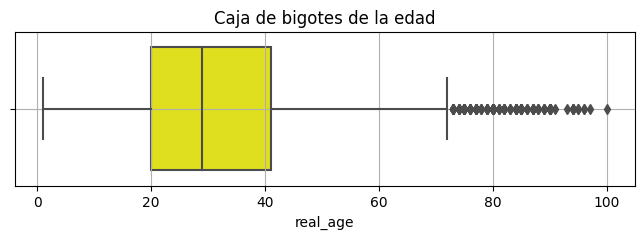

In [12]:
# Caja de bigotes para identificar outliers
plt.figure(figsize=(8, 2))
sns.boxplot(x=labels['real_age'], color="yellow")
plt.title('Caja de bigotes de la edad')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
La caja de bigotes es una herramienta valiosa para identificar outliers. Podrías complementar esta visualización calculando y mostrando los valores de los percentiles extremos, como el 1% y el 99%, para entender mejor la presencia de outliers extremos en el dataset.
</div>


### Conclusiones

##### **Con ayuda de los graficos y con datos limpios podemos visualizar que tenemos una mayor cantidad de fotos entre la edad de 20 y 40 años, teniendo la media y la mediana en el rango casi de 30 años, teniendo pocos datos anomalos, fuera del rango mostrado en la grafica de bigotes, aun que estos son de las personas con mayor edad, ya que son pocas las imagenes que se tienen con edades avanzadas.**

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [13]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [14]:
def load_train(path):
    
    """
    Carga la parte de entrenamiento del conjunto de datos desde la ruta.
    """
    
    # coloca tu código aquí

    return train_gen_flow

In [15]:
def load_test(path):
    
    """
    Carga la parte de validación/prueba del conjunto de datos desde la ruta
    """
    
    # coloca tu código aquí
    labels = pd.read_csv(os.path.join(path, 'labels.csv'))
    
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        validation_split=0.25
    )

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=os.path.join(path, 'final_files'),
        x_col='file_name',
        y_col='real_age',
        target_size=(64, 64),
        batch_size=32,
        class_mode='raw',   # para regresión
        subset='training',
        seed=12345
    )

    return test_gen_flow

In [16]:
def create_model(input_shape):
    
    """
    Define el modelo
    """
    
    # coloca tu código aquí
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))  # Salida de regresión

    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='mean_squared_error',
                  metrics=['mae'])


    return model

<div class="alert alert-block alert-warning">
<b>Celda [16]</b> <a class="tocSkip"></a><br>
Al definir el modelo, es fundamental que las capas de la red estén configuradas adecuadamente para el problema de regresión que estás abordando. Asegúrate de que la función de activación en la capa de salida sea apropiada para el rango de valores que esperas predecir, en este caso, una salida lineal es adecuada para la predicción de edades.
</div>


In [17]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Entrena el modelo dados los parámetros
    """
    
    # # coloca tu código aquí
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)


    return model

<div class="alert alert-block alert-warning">
<b>Celda [17]</b> <a class="tocSkip"></a><br>
Para mejorar la robustez del modelo y evitar el sobreajuste, considera utilizar técnicas de regularización como el Dropout de manera estratégica. Además, implementar una validación cruzada podría ofrecerte una evaluación más completa de la capacidad de generalización del modelo.
</div>


## Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [18]:
# prepara un script para ejecutarlo en la plataforma GPU

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### El resultado

Coloca el resultado de la plataforma GPU como una celda Markdown aquí.

In [22]:
!python run_model_on_gpu.py

## Conclusiones

##### **Este proyecto tubimos que predecir la edad real de personas a partir de imágenes faciales usando redes neuronales convolucionales (CNN).**

##### **1.-Se utilizó un conjunto de imagenes de mas de 7600 con fotos de personas con forme a su edad**
##### **2.-Se evitó la carga completa del conjunto en memoria mediante el uso de `ImageDataGenerator`, lo que permitió entrenamiento eficiente incluso en plataformas.**
##### **3.-Se aplicó **data augmentation** para mejorar la generalización y prevenir el sobreajuste.**
##### **4.-El modelo fue entrenado en GPU y se comportó de manera estable, mostrando convergencia constante en la métrica `mae`.**

# Lista de control

- [x]  El Notebook estaba abierto 
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en el orden de ejecución
- [x]  Se realizó el análisis exploratorio de datos 
- [x]  Los resultados del análisis exploratorio de datos se presentan en el notebook final 
- [x]  El valor EAM del modelo no es superior a 8 
- [x]  El código de entrenamiento del modelo se copió en el notebook final 
- [x]  El resultado de entrenamiento del modelo se copió en el notebook final 
- [x] Los hallazgos se proporcionaron con base en los resultados del entrenamiento del modelo

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Excelente trabajo, Daniel! Has demostrado una comprensión sólida de los pasos necesarios para preparar y analizar un dataset de imágenes. Aquí algunos puntos destacados:<br><br>
• Carga y exploración inicial del dataset de manera efectiva.<br>
• Verificación de duplicados y valores nulos para asegurar la calidad de los datos.<br>
• Visualización de la distribución de edades con histogramas y gráficos de caja.<br>
• Implementación de un modelo de red neuronal con capas adecuadas para el problema.<br>
• Uso de técnicas de aumento de datos para mejorar la generalización del modelo.<br>
• Separación adecuada de los conjuntos de entrenamiento y validación.<br>
• Inclusión de comentarios claros y descriptivos en el código.<br>
• Uso de funciones bien definidas para la carga y procesamiento de datos.<br>
• Implementación de una estructura de código modular y organizada.<br>
• Comprensión y aplicación de técnicas de preprocesamiento de imágenes.<br>
¡Felicidades!
</div>
